In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

import warnings
warnings.filterwarnings("ignore")


In [2]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [3]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [4]:
df=pd.read_csv("h1n1_vaccine_prediction.csv")
df.head(3)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0


In [5]:
df.shape

(26707, 34)

In [6]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

<Axes: xlabel='sex', ylabel='count'>

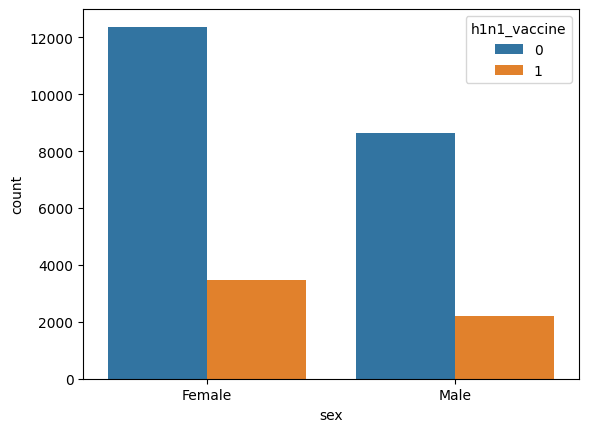

In [7]:
sns.countplot(x="sex",hue="h1n1_vaccine",data=df)

<Axes: xlabel='marital_status', ylabel='count'>

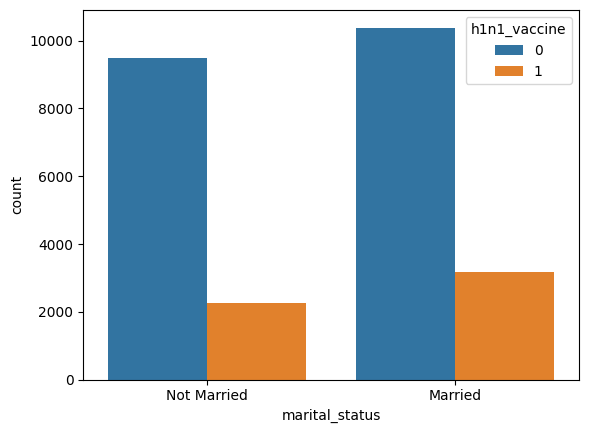

In [8]:
sns.countplot(x="marital_status",hue="h1n1_vaccine",data=df)

In [9]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [11]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

<Axes: >

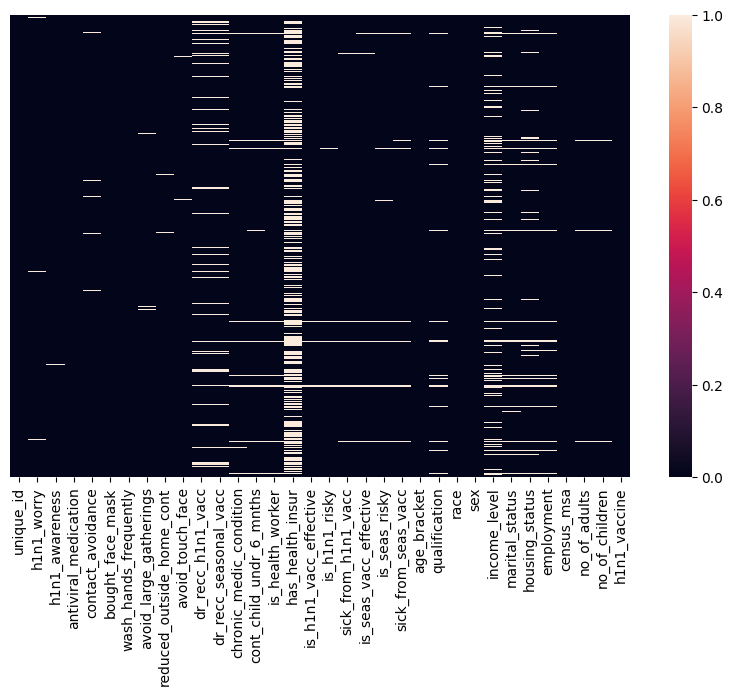

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False)

In [13]:
#removing the attributes which are not necessary or which do not affect the result
df=df.drop('h1n1_worry',axis=1)
df=df.drop('h1n1_awareness',axis=1)
df=df.drop('qualification',axis=1)
df=df.drop('race',axis=1)
df=df.drop('census_msa',axis=1)
df=df.drop('housing_status',axis=1)
df=df.drop('income_level',axis=1)
df=df.drop('avoid_large_gatherings',axis=1)
df=df.drop('reduced_outside_home_cont',axis=1)
df=df.drop('contact_avoidance',axis=1)
df=df.drop('dr_recc_seasonal_vacc',axis=1)
df=df.drop('avoid_touch_face',axis=1)
df=df.drop('has_health_insur',axis=1)
df=df.drop('is_seas_vacc_effective',axis=1)
df=df.drop('wash_hands_frequently',axis=1)
df=df.drop('marital_status',axis=1)

#checking if the attributes are removed or not
df.head(3)


,unique_id,antiviral_medication,bought_face_mask,dr_recc_h1n1_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_risky,sick_from_seas_vacc,age_bracket,sex,employment,no_of_adults,no_of_children,h1n1_vaccine
0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,1.0,2.0,55 - 64 Years,Female,Not in Labor Force,0.0,0.0,0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,2.0,4.0,35 - 44 Years,Male,Employed,0.0,0.0,0
2,2,0.0,0.0,NaN,1.0,0.0,0.0,3.0,1.0,1.0,1.0,2.0,18 - 34 Years,Male,Employed,2.0,0.0,0


In [14]:
df.isnull().sum()

unique_id                     0
antiviral_medication         71
bought_face_mask             19
dr_recc_h1n1_vacc          2160
chronic_medic_condition     971
cont_child_undr_6_mnths     820
is_health_worker            804
is_h1n1_vacc_effective      391
is_h1n1_risky               388
sick_from_h1n1_vacc         395
is_seas_risky               514
sick_from_seas_vacc         537
age_bracket                   0
sex                           0
employment                 1463
no_of_adults                249
no_of_children              249
h1n1_vaccine                  0
dtype: int64

In [15]:
#preparing the model training and filling the null values
print(df["antiviral_medication"].value_counts())
print(df["bought_face_mask"].value_counts())
print(df["dr_recc_h1n1_vacc"].value_counts())
print(df["chronic_medic_condition"].value_counts())
print(df["cont_child_undr_6_mnths"].value_counts())
print(df["is_health_worker"].value_counts())
print(df["is_h1n1_vacc_effective"].value_counts())
print(df["is_h1n1_risky"].value_counts())
print(df["sick_from_h1n1_vacc"].value_counts())
print(df["is_seas_risky"].value_counts())
print(df["sick_from_seas_vacc"].value_counts())
print(df["employment"].value_counts())
print(df["no_of_adults"].value_counts())
print(df["no_of_children"].value_counts())

0.0    25335
1.0     1301
Name: antiviral_medication, dtype: int64
0.0    24847
1.0     1841
Name: bought_face_mask, dtype: int64
0.0    19139
1.0     5408
Name: dr_recc_h1n1_vacc, dtype: int64
0.0    18446
1.0     7290
Name: chronic_medic_condition, dtype: int64
0.0    23749
1.0     2138
Name: cont_child_undr_6_mnths, dtype: int64
0.0    23004
1.0     2899
Name: is_health_worker, dtype: int64
4.0    11683
5.0     7166
3.0     4723
2.0     1858
1.0      886
Name: is_h1n1_vacc_effective, dtype: int64
2.0    9919
1.0    8139
4.0    5394
5.0    1750
3.0    1117
Name: is_h1n1_risky, dtype: int64
2.0    9129
1.0    8998
4.0    5850
5.0    2187
3.0     148
Name: sick_from_h1n1_vacc, dtype: int64
2.0    8954
4.0    7630
1.0    5974
5.0    2958
3.0     677
Name: is_seas_risky, dtype: int64
1.0    11870
2.0     7633
4.0     4852
5.0     1721
3.0       94
Name: sick_from_seas_vacc, dtype: int64
Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: employment, 

unique_id                  0
antiviral_medication       0
bought_face_mask           0
dr_recc_h1n1_vacc          0
chronic_medic_condition    0
cont_child_undr_6_mnths    0
is_health_worker           0
is_h1n1_vacc_effective     0
is_h1n1_risky              0
sick_from_h1n1_vacc        0
is_seas_risky              0
sick_from_seas_vacc        0
age_bracket                0
sex                        0
employment                 0
no_of_adults               0
no_of_children             0
h1n1_vaccine               0
dtype: int64


<Axes: >

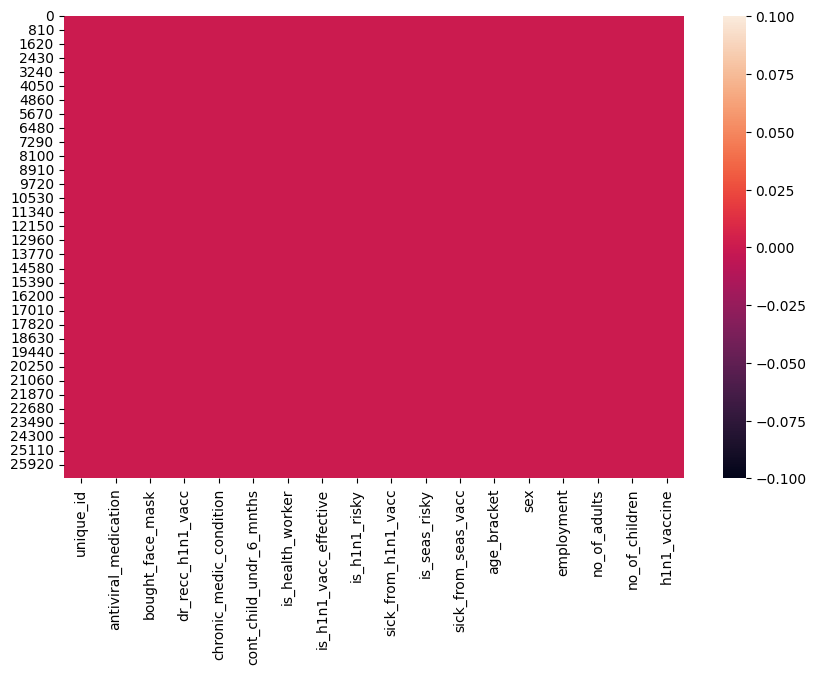

In [16]:
#filling all the missing values
df["employment"].fillna(df["employment"].mode()[0],inplace=True)
df["no_of_children"].fillna(df["no_of_children"].median(),inplace=True)
df["no_of_adults"].fillna(df["no_of_adults"].median(),inplace=True)
df["sick_from_seas_vacc"].fillna(df["sick_from_seas_vacc"].median(),inplace=True)
df["is_h1n1_risky"].fillna(df["is_h1n1_risky"].median(),inplace=True)
df["is_h1n1_vacc_effective"].fillna(df["is_h1n1_vacc_effective"].median(),inplace=True)
df["is_health_worker"].fillna(df["is_health_worker"].median(),inplace=True)
df["cont_child_undr_6_mnths"].fillna(df["cont_child_undr_6_mnths"].median(),inplace=True)
df["chronic_medic_condition"].fillna(df["chronic_medic_condition"].median(),inplace=True)
df["dr_recc_h1n1_vacc"].fillna(df["dr_recc_h1n1_vacc"].median(),inplace=True)
df["bought_face_mask"].fillna(df["bought_face_mask"].median(),inplace=True)
df["antiviral_medication"].fillna(df["antiviral_medication"].median(),inplace=True)
df["sick_from_h1n1_vacc"].fillna(df["sick_from_h1n1_vacc"].median(),inplace=True)
df["is_seas_risky"].fillna(df["is_seas_risky"].median(),inplace=True)
print(df.isnull().sum())
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())


In [17]:
df.head(5)

,unique_id,antiviral_medication,bought_face_mask,dr_recc_h1n1_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_risky,sick_from_seas_vacc,age_bracket,sex,employment,no_of_adults,no_of_children,h1n1_vaccine
0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,1.0,2.0,55 - 64 Years,Female,Not in Labor Force,0.0,0.0,0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,2.0,4.0,35 - 44 Years,Male,Employed,0.0,0.0,0
2,2,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,1.0,2.0,18 - 34 Years,Male,Employed,2.0,0.0,0
3,3,0.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,5.0,4.0,1.0,65+ Years,Female,Not in Labor Force,0.0,0.0,0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,1.0,4.0,45 - 54 Years,Female,Employed,1.0,0.0,0


26707 26707


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

df['h1n1_vaccine'] = le.fit_transform(df['h1n1_vaccine'])
categorical_features = ['age_bracket', 'sex', 'employment']
ct = ColumnTransformer([('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
X= ct.fit_transform(df.drop('h1n1_vaccine', axis=1))
y = df['h1n1_vaccine']
print(len(X), len(y))


26707 26707


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()


Logistic Regression Accuracy: 0.8242231374017222


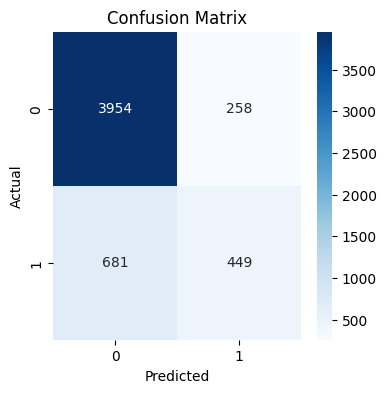

In [28]:
log = LogisticRegression()
log.fit(X_train, y_train)
log_pred = log.predict(X_test)
log_accuracy = accuracy_score(y_test, log_pred)
print("Logistic Regression Accuracy:", log_accuracy)
#confusion matrix
cm = confusion_matrix(y_test, log_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Decision Tree Accuracy: 0.7465368775739424


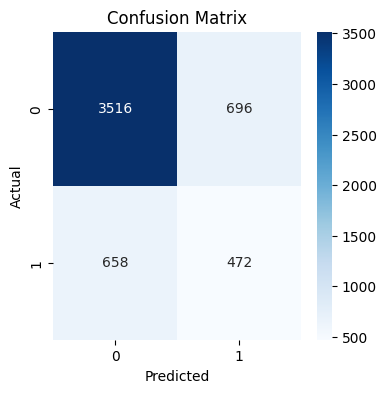

In [29]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)
#confusion matrix
cm = confusion_matrix(y_test,dt_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Random Forest Accuracy: 0.8197304380381879


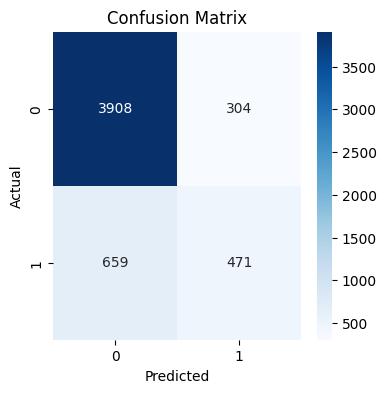

In [30]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
#confusion matrix
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
StSc = StandardScaler()
x_std = StSc.fit_transform(X_train)
x_test  = StSc.fit_transform(X_test)
print("After Standardization\nMean ",np.mean(X_train),"Standard Deviation ",np.std(X_train),"\n")



After Standardization
Mean  495.89869724627505 Standard Deviation  2929.221581317338 



              precision    recall  f1-score   support

           0       0.95      0.86      0.90      4644
           1       0.42      0.69      0.52       698

    accuracy                           0.84      5342
   macro avg       0.69      0.77      0.71      5342
weighted avg       0.88      0.84      0.85      5342

Gradient Boosting Accuracy: 0.8371396480718832


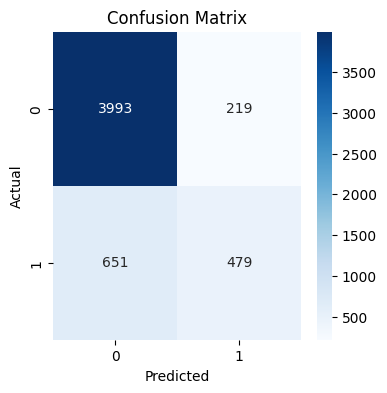

In [33]:
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)
print(classification_report(gb_pred,y_test))
gb_accuracy = accuracy_score(y_test, gb_pred)
print("Gradient Boosting Accuracy:", gb_accuracy)
#confusion matrix
cm = confusion_matrix(y_test, gb_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4212
           1       0.70      0.40      0.51      1130

    accuracy                           0.84      5342
   macro avg       0.78      0.68      0.71      5342
weighted avg       0.82      0.84      0.82      5342

Ada Boost Accuracy: 0.8369524522650693


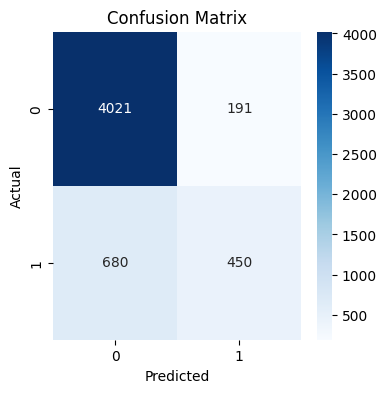

In [34]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
ada_pred = ada.predict(X_test)
print(classification_report(y_test,ada_pred))
ada_accuracy = accuracy_score(y_test, ada_pred)
print("Ada Boost Accuracy:", ada_accuracy)
#confusion matrix
cm = confusion_matrix(y_test, ada_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      4212
           1       0.27      0.08      0.13      1130

    accuracy                           0.76      5342
   macro avg       0.53      0.51      0.49      5342
weighted avg       0.68      0.76      0.70      5342

KNeighbours Classifier Accuracy: 0.7583302134032198


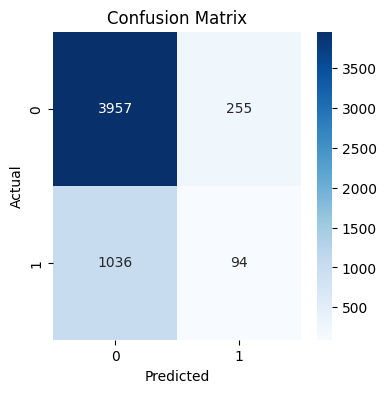

In [35]:

KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
KNN_pred = KNN.predict(X_test)
print(classification_report(y_test,KNN_pred))
KNN_accuracy = accuracy_score(y_test, KNN_pred)
print("KNeighbours Classifier Accuracy:", KNN_accuracy)
#confusion matrix
cm = confusion_matrix(y_test, KNN_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


              precision    recall  f1-score   support

           0       0.87      0.90      0.88      4212
           1       0.57      0.52      0.54      1130

    accuracy                           0.82      5342
   macro avg       0.72      0.71      0.71      5342
weighted avg       0.81      0.82      0.81      5342

Gaussian Classifier Accuracy: 0.8154249344814676


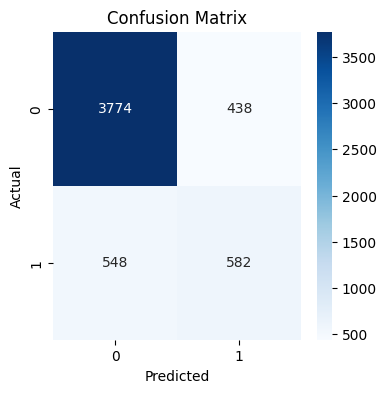

In [36]:
gu = GaussianNB()
gu.fit(X_train,y_train)
gu_pred = gu.predict(X_test)
print(classification_report(y_test,gu_pred))
gu_accuracy = accuracy_score(y_test, gu_pred)
print("Gaussian Classifier Accuracy:", gu_accuracy)
#confusion matrix
cm = confusion_matrix(y_test, gu_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
#using multiple classifiers we train and test the data
# we can know which model is more accurate
#using the most accurate model we can predict if the person is vacinated or not

In [38]:
#accuracy in percentages
print(f"Logistic Regression Accuracy: {log_accuracy*100} %")
print(f"Decision Tree Accuracy: {dt_accuracy*100} %")
print(f"Random Forest Accuracy: {rf_accuracy*100} %")
print(f"Gradient Boosting Accuracy:{ gb_accuracy*100} %")
print(f"Ada Boost Accuracy: {ada_accuracy*100} %")
print(f"KNeighbours Classifier Accuracy:{ KNN_accuracy*100} %")
print(f"Gaussian Classifier Accuracy: {gu_accuracy*100} %")



Logistic Regression Accuracy: 82.42231374017221 %
Decision Tree Accuracy: 74.65368775739424 %
Random Forest Accuracy: 81.9730438038188 %
Gradient Boosting Accuracy:83.71396480718832 %
Ada Boost Accuracy: 83.69524522650693 %
KNeighbours Classifier Accuracy:75.83302134032198 %
Gaussian Classifier Accuracy: 81.54249344814676 %


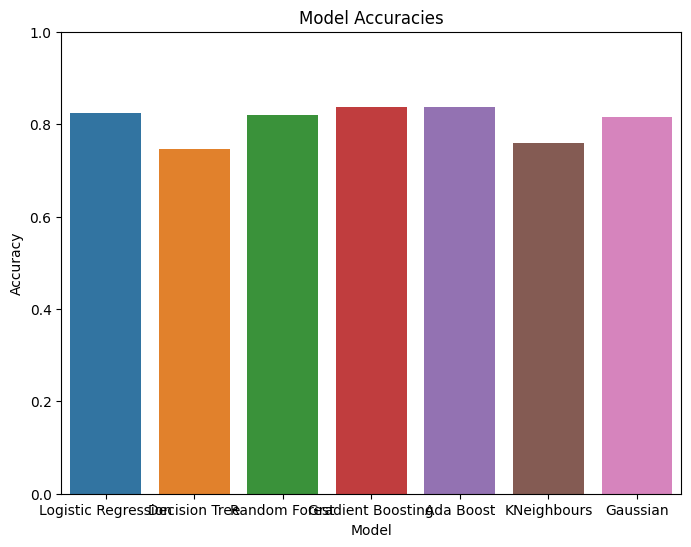

In [39]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest','Gradient Boosting','Ada Boost','KNeighbours','Gaussian']
accuracies = [log_accuracy, dt_accuracy, rf_accuracy,gb_accuracy,ada_accuracy,KNN_accuracy,gu_accuracy]
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies)
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()

the Best model is considered for predicting if the person is vaccinated or not